<a href="https://colab.research.google.com/github/mayankraj25/Student-Performance-/blob/main/trained_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
# Provide the actual file name with its extension
file_path = "Student_Performance.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "nikhil7280/student-performance-multiple-linear-regression",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

df.head()

<ipython-input-1-7ae592193b20>:11: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
df_encoded=pd.get_dummies(df,columns=['Extracurricular Activities'])

X=df_encoded.drop('Performance Index',axis=1)
y=df_encoded['Performance Index']

scale=StandardScaler()
X_scaled=scale.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
accuracy=r2_score(y_test,prediction)
mae=mean_absolute_error(y_test,prediction)
print(mae)
print(accuracy)

1.6111213463123053
0.9889832909573145


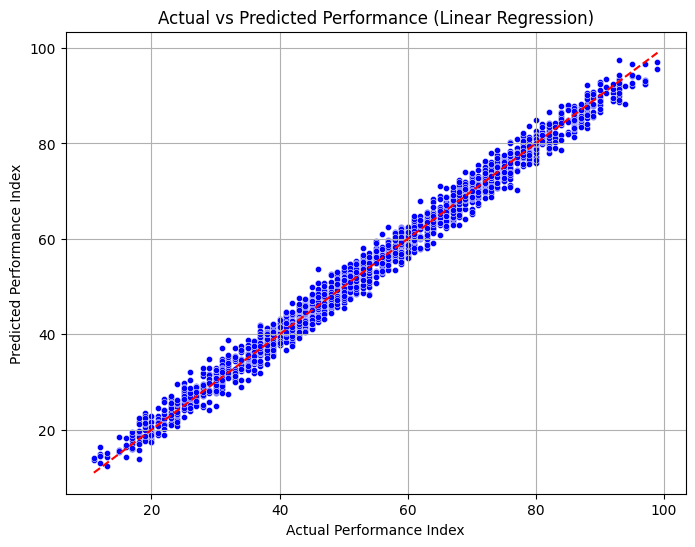

In [11]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=prediction, color='blue', s=20)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Performance Index")
plt.ylabel("Predicted Performance Index")
plt.title("Actual vs Predicted Performance (Linear Regression)")
plt.grid(True)
plt.show()